# Рандомизация сети
  ![](switch.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
import networkx as nx

In [2]:
G=nx.read_edgelist('bio-diseasome.txt') # сеть для проверки алгоритмов (можно использовать любую)

### Алгоритм рандомизации и проверка алгоритма (5 балла)
* напишите функцию, проверяющую, совпадают ли два вектора степеней для заданных графов $G_1$ и $G_2$;

In [3]:
def check_degrees(G1,G2):
    d1 = [(int(node), val) for (node, val) in G1.degree()]
    G1_degrees = [val for (node, val) in sorted(d1, key=lambda pair: pair[0])] #распределение степеней вершин графа G1
    
    d2 = [(int(node), val) for (node, val) in G2.degree()]
    G2_degrees = [val for (node, val) in sorted(d2, key=lambda pair: pair[0])] #распределение степеней вершин графа G2
    
    if (G1_degrees == G2_degrees):
        return True
    else: 
        return False

* напишите функцию рандомизации сети: 
  * (А) случайным образом выберите пару ребер, которые можно переключить между собой (новые ребра не должны быть петлями и мультиребрами!!!) и выполните переключение;
  * (B) повторите шаг (A) $N_{steps}$ раз. 
  
* проверьте, что ваша рандомизация действительно сохраняет степени вершин;

In [4]:
def random_rewiring(G,N_steps):
    G_rand=G.copy()
    for i in range(int(N_steps)): 
        edges = [tuple(e) for e in G_rand.edges()] 
        e1 = edges[random.randint(0,len(edges)-1)]
        e2 = edges[random.randint(0,len(edges)-1)]

        while ( e1[0] == e2[1] or e1[1] == e2[0] or G_rand.has_edge(e1[0], e2[1]) or G_rand.has_edge(e1[1], e2[0])
              or e1 == e2): #проверка, чтобы не получилось петель и мультиребер при переключении
            e1 = edges[random.randint(0,len(edges)-1)]
            e2 = edges[random.randint(0,len(edges)-1)]
            
        #переключение
        G_rand.add_edge(e1[0], e2[1])
        G_rand.add_edge(e1[1], e2[0])
        G_rand.remove_edge(e1[0],e1[1])
        G_rand.remove_edge(e2[0],e2[1])
    
    return G_rand

In [19]:
G_rand = random_rewiring(G, 1000)

In [21]:
check_degrees(G, G_rand)

True

* напишите функцию, вычисляющую долю связей, оставшихся на месте после рандомизации сети $G$;

* постройте зависимость доли ребер, остающихся на месте от числа переключений. Число переключений выразите через число ребер в сети, т.е. $N_{steps}=\left[0.1E,~0.2E,~\dots~5E\right]$, $E$- число ребер.

In [7]:
def remained_edges(G,G_rand):
    num_edges = G.number_of_edges()  #количество ребер в сети 
    edges_G = [tuple(e) for e in G.edges()]  #ребра исходной сети 
    edges_G_rand = [tuple(e) for e in G_rand.edges()] #ребра сети после рандомизации   
    remain = 0
    for i in edges_G_rand:
        if (i in edges_G):
            remain+=1
    return remain/num_edges #доля ребер, оставшихся на месте

In [22]:
remained_edges(G, G_rand)

0.20707070707070707

In [9]:
E = G.number_of_edges() #количество ребер в сети 
N_steps = np.arange(0.1*E, 5*E + 0.1*E, 0.1*E)  #количество переключений

In [10]:
remained = []
for i in N_steps:
    G_rand1 = random_rewiring(G, i)
    remained.append(remained_edges(G, G_rand1))  

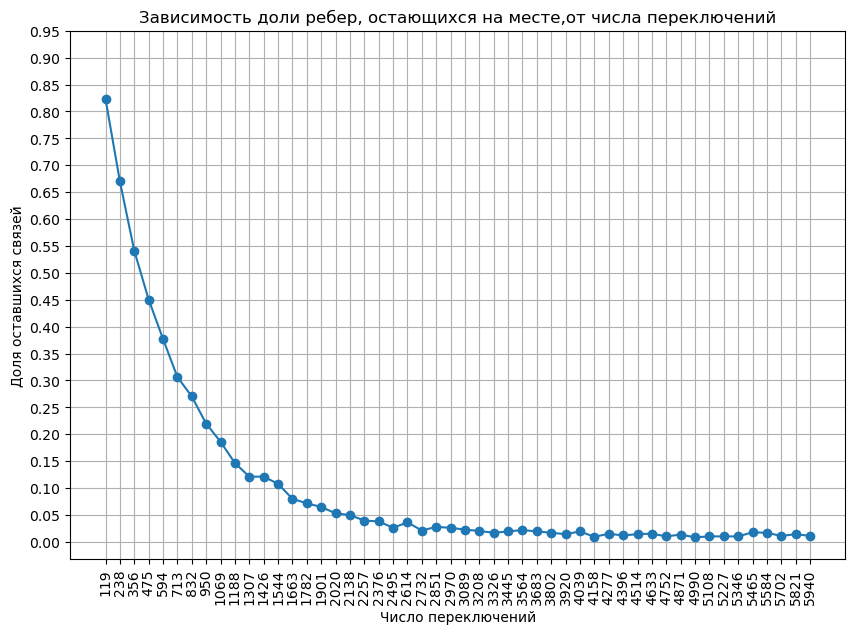

In [11]:
fig = plt.figure(figsize = (10,7), dpi=100)
plt.plot(N_steps, remained, '-o')
plt.xticks(N_steps, rotation=90)
plt.yticks(np.arange(0, 1.0, 0.05))
plt.grid(True)
plt.xlabel("Число переключений")
plt.ylabel("Доля оставшихся связей")
plt.title("Зависимость доли ребер, остающихся на месте,от числа переключений");

* вычислите различные структурные характеристики заданой сети (коэффициенты кластеризации, средний кратчайший путь, диаметр) и рандомизированной. Как изменились свойства? Почему? 

In [12]:
#Изначальная сеть 

print("Средний коэф. кластеризации", nx.average_clustering(G))
print("Транзитивность", nx.transitivity(G))
print("Средний кратчайший путь", nx.average_shortest_path_length(G))
print("Диаметр", nx.diameter(G))


Средний коэф. кластеризации 0.6358304997771197
Транзитивность 0.4304705634100021
Средний кратчайший путь 6.5089937532926925
Диаметр 15


In [20]:
#Сеть после рандомизации 

print("Средний коэф. кластеризации", nx.average_clustering(G_rand))
print("Транзитивность", nx.transitivity(G_rand))
print("Средний кратчайший путь", nx.average_shortest_path_length(G_rand))
print("Диаметр", nx.diameter(G_rand))


Средний коэф. кластеризации 0.026047010108551726
Транзитивность 0.019624393331926566
Средний кратчайший путь 3.863355159178144
Диаметр 8


$\underline{Вывод:}$ Исходя из сравнения полученных значений структурных храктеристик исходной и рандомизированной сетей, можно сделать вывод, что, привнося рандомизацию в сеть с сохранением распределения степеней, топологичские характеристики сети меняются. Таким образом, исходная сеть выражает некоторые свойства, которые не являются случайными, а обусловляют некоторую специальную связь и несут функциональность.  